# Yelp Reviews  Sentiment Analysis Natural Language Processing 

# 📘 Introduction
In today's digital age, online reviews play a crucial role in shaping consumer decisions and business reputations. Understanding and categorizing these reviews can provide valuable insights for businesses, allowing them to quickly grasp public sentiment and identify areas for improvement. However, manually sifting through countless reviews to determine their overall sentiment can be an overwhelming and time-consuming task.

In this project, I developed an AI-powered sentiment classification system that categorizes Yelp reviews as either 1-star (negative) or 5-star (positive) based solely on their text content. Unlike more complex natural language processing (NLP) tasks that might require deep dives into model architectures, I leveraged efficient pipeline methods to streamline the classification process, focusing on practical application.

# 🎯 Objectives:
Classify Yelp reviews into two distinct sentiment categories: 1-star (negative) or 5-star (positive), based on the textual content of the review.

Utilize and demonstrate the effectiveness of NLP pipeline methods for text classification.

Evaluate the model's performance using standard classification metrics to assess its accuracy and reliability in distinguishing between positive and negative reviews.

This system aims to assist businesses and analysts in quickly extracting valuable sentiment insights from large volumes of Yelp reviews, enabling more informed, data-driven decisions to enhance customer satisfaction and business performance

## Imports
 **Import the usual suspects. :) **

In [71]:
import numpy as np
import pandas as pd

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [72]:
yelp = pd.read_csv('yelp.csv')

** Checking the head, info , and describe methods on yelp.**

In [73]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [74]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [75]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [76]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

Let's explore the data

## Imports

**Importing the data visualization libraries if you haven't done so already.**

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

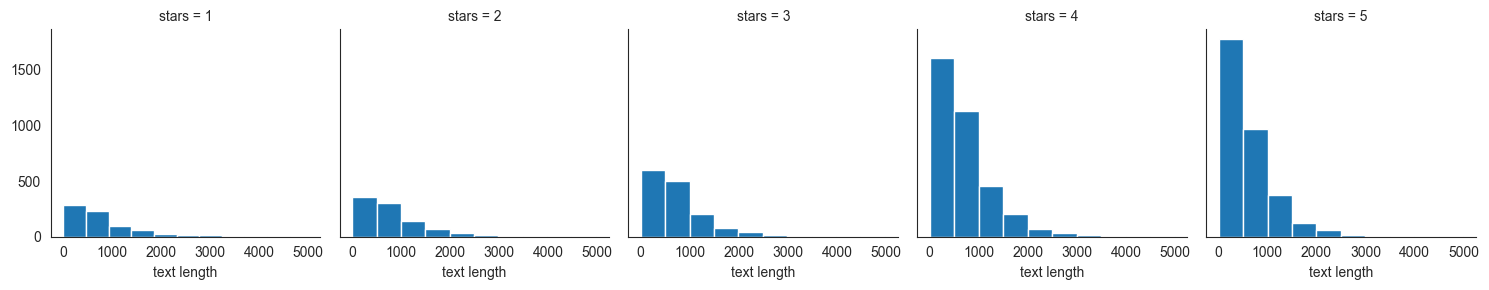

In [78]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Creating a boxplot of text length for each star category.**

C:\Users\91960\AppData\Local\Temp\ipykernel_27692\468530455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='text length'>

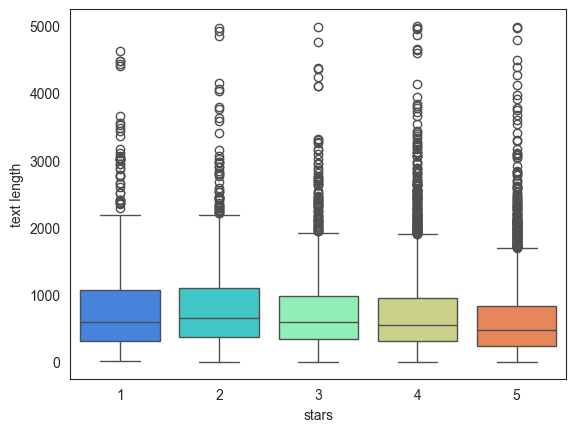

In [79]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Creating a countplot of the number of occurrences for each type of star rating.**

C:\Users\91960\AppData\Local\Temp\ipykernel_27692\2116447000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

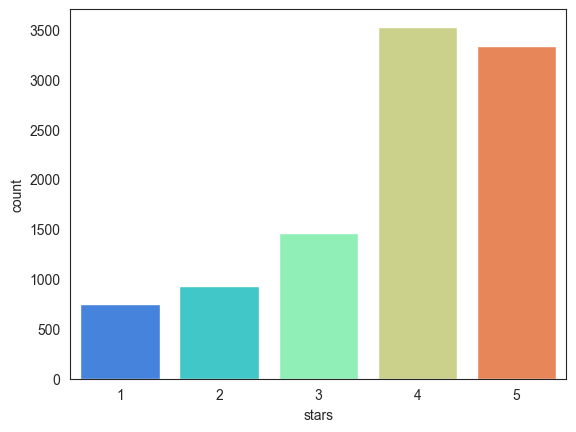

In [80]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Using groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [82]:
stars = yelp.groupby('stars').mean(numeric_only = True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [83]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Now using seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

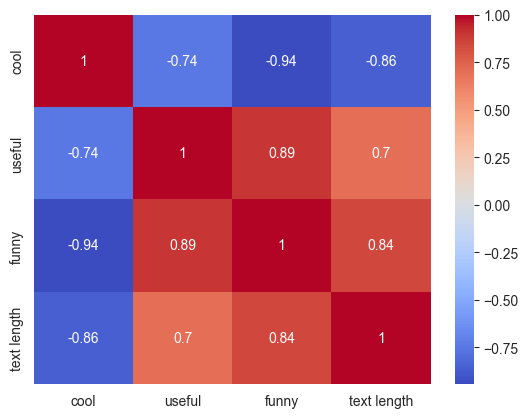

In [84]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task


**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [85]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

** Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels).**

In [86]:
X = yelp_class['text']
y = yelp_class['stars']

**Importing CountVectorizer and create a CountVectorizer object.**

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [42]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Using train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

Time to train a model!

** Importing MultinomialNB and creating an instance of the estimator and call is nb **

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [46]:
nb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Predictions and Evaluations

Time to see how our model did!

**Using the predict method off of nb to predict labels from X_test.**

In [47]:
predictions = nb.predict(X_test)

** Creating a confusion matrix and classification report using these predictions and y_test **

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [50]:
from sklearn.feature_extraction.text import   CountVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

** Importing Pipeline from sklearn. **

In [51]:
from sklearn.pipeline import Pipeline

**creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [52]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all our pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [53]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**fitting the pipeline to the training data. Remember  not to use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [54]:
# May take some time
pipeline.fit(X_train,y_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### Predictions and Evaluation

** Now using the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [55]:
predictions = pipeline.predict(X_test)

In [88]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions,zero_division = True))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.91      0.50      0.45      1226
weighted avg       0.85      0.81      0.73      1226



Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more we can play with:

**Some other things to try....**
we can try going back and playing around with the pipeline steps and seeing if creating a custom analyzer. Or recreating the pipeline with just the CountVectorizer() and NaiveBayes. 

# Further Analysis could be done.
